!pip3 install pandas<br>
!pip3 install numpy<br>
!pip3 install matplotlib<br>
!pip3 install statsmodels<br>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

연속형 임의의 데이터 생성

In [2]:
np.random.seed(0)

Temperature = np.random.normal(30,3,100)
IceAmericano = Temperature + np.random.normal(100,8,100)
InteriorPrice = np.random.normal(60,20,100)

데이터 프레임 형태로 2개 데이터 합치기<br>

In [3]:
Data = pd.DataFrame({
    'Temp':Temperature,
    'Sales':IceAmericano,
    'InteriorPrice':InteriorPrice
})

In [4]:
Data.describe()

,Temp,Sales,InteriorPrice
count,100.000000,100.000000,100.000000
mean,30.179424,130.835528,58.815355
std,3.038879,9.170076,19.135973
min,22.341031,107.604044,4.548145
25%,28.068430,123.580449,48.068709
50%,30.282288,129.709430,58.492823
75%,32.211232,138.323847,70.773134
max,36.809264,150.357363,106.078334


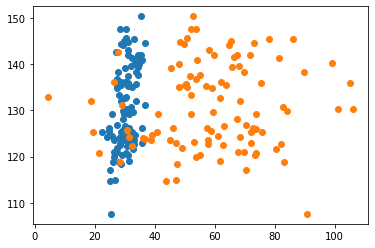

In [5]:
plt.plot(Data['Temp'], Data['Sales'], 'o')
plt.plot(Data['InteriorPrice'], Data['Sales'], 'o')
plt.show()

선형회귀 모델, 딥러닝 framework (keras)로 만들기

In [30]:
model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(2,)))
model.compile(loss='mse',optimizer=Adam(learning_rate=0.5))

In [22]:
Train_x = Data[ ['Temp', 'InteriorPrice']]
Train_y = Data[ ['Sales'] ]

In [23]:
hist = model.fit(x=Train_x, y=Train_y, epochs=50, shuffle=True)

Epoch 1/50
4/4 [==============================] - 0s 3ms/step - loss: 4102.2485
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 4634.5166
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 1639.5428
Epoch 4/50
4/4 [==============================] - 0s 1ms/step - loss: 2089.6760
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 1077.1047
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 1058.2689
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 754.0745
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 595.7074
Epoch 9/50
4/4 [==============================] - 0s 1ms/step - loss: 437.6908
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 318.0635
Epoch 11/50
4/4 [==============================] - 0s 2ms/step - loss: 239.9883
Epoch 12/50
4/4 [==============================] - 0s 3ms/step - loss: 192.7594
Epoch 13/50
4/4 [==========================

4/4 [==============================] - 0s 1ms/step


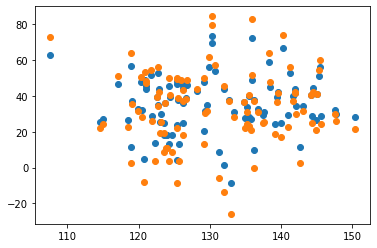

In [31]:
plt.plot(Data['Sales'], model.predict(Data[['Temp', 'InteriorPrice']]), 'o')
plt.show()

In [6]:
## Weight를 가져와서 직접 Linear regression 계산해보기

In [26]:
model.get_weights()

[array([[3.8602085 ],
        [0.18158452]], dtype=float32),
 array([9.345297], dtype=float32)]

In [27]:
Data.head()

,Temp,Sales,InteriorPrice
0,35.292157,150.357363,52.616363
1,31.200472,120.418399,55.212416
2,32.936214,122.772334,81.993192
3,36.722680,144.477853,73.105275
4,35.602674,126.217687,72.802631


In [28]:
35.2921 * 3.8602 + 52.6163 * 0.18158 + 9.345297

155.13392917399997

In [29]:
model.predict(Data[['Temp', 'InteriorPrice']])[0]

4/4 [==============================] - 0s 2ms/step


array([155.13469], dtype=float32)